<a href="https://colab.research.google.com/github/craig-clifford/colab/blob/main/H-F%20and%20Reimann%20sums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Midpoint Riemann Sum: 0.33249999999999996


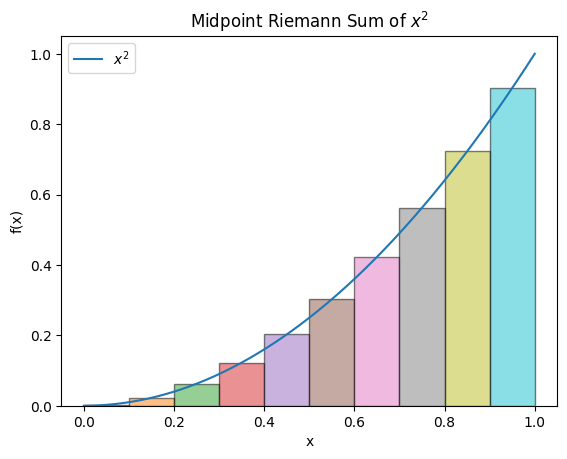

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Function to calculate the midpoint Riemann sum
def midpoint_riemann_sum(f, a, b, n):
    dx = (b - a) / n
    midpoints = np.linspace(a + dx/2, b - dx/2, n)
    return np.sum(f(midpoints) * dx)

# Function to be integrated
def f(x):
    return x**2

# Parameters
a = 0  # Start of interval
b = 1  # End of interval
n = 10  # Number of subintervals

# Calculate the midpoint Riemann sum
riemann_sum = midpoint_riemann_sum(f, a, b, n)
print(f"Midpoint Riemann Sum: {riemann_sum}")

# Plotting
x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, label='$x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Midpoint Riemann Sum of $x^2$')

# Plot the rectangles
dx = (b - a) / n
for i in range(n):
    mid_x = a + dx/2 + i*dx
    plt.bar(mid_x, f(mid_x), width=dx, align='center', edgecolor='black', alpha=0.5)

plt.legend()
plt.show()

Left Riemann Sum: 18.275624999999998


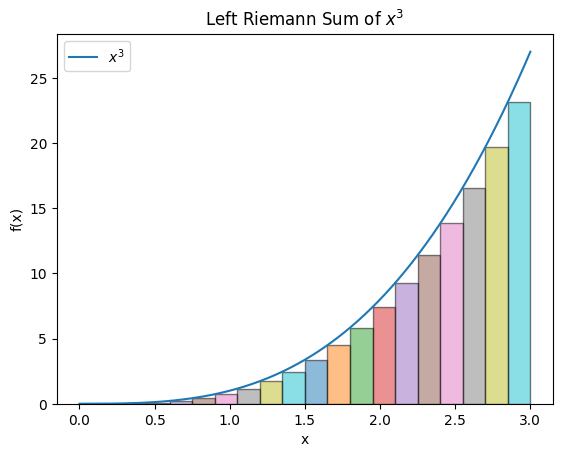

In [1]:
# prompt: use python to plot a left-hand Riemann sum of x^3 from 0 to 3

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the left Riemann sum
def left_riemann_sum(f, a, b, n):
    dx = (b - a) / n
    left_endpoints = np.linspace(a, b - dx, n)
    return np.sum(f(left_endpoints) * dx)

# Function to be integrated
def f(x):
    return x**3

# Parameters
a = 0  # Start of interval
b = 3  # End of interval
n = 20  # Number of subintervals

# Calculate the left Riemann sum
riemann_sum = left_riemann_sum(f, a, b, n)
print(f"Left Riemann Sum: {riemann_sum}")

# Plotting
x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, label='$x^3$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Left Riemann Sum of $x^3$')

# Plot the rectangles
dx = (b - a) / n
for i in range(n):
    left_x = a + i * dx
    plt.bar(left_x, f(left_x), width=dx, align='edge', edgecolor='black', alpha=0.5)

plt.legend()
plt.show()

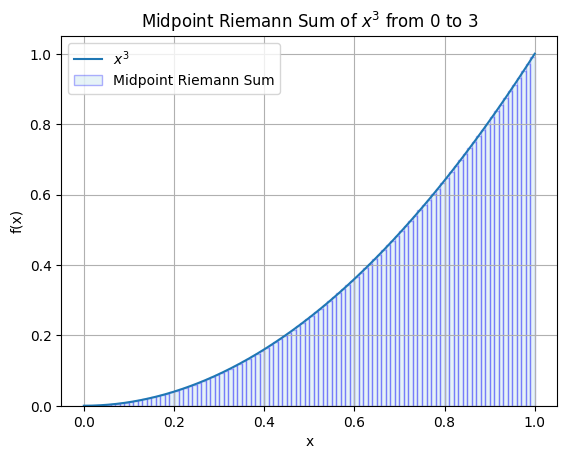

0.3333250000000001

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**2

# Define the interval and number of rectangles
a, b = 0, 1
n = 100  # number of rectangles
dx = (b - a) / n

# Midpoints
midpoints = np.linspace(a + dx/2, b - dx/2, n)
midpoint_sum = np.sum(f(midpoints) * dx)

# Plot the function
x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, label='$x^3$')
plt.bar(midpoints, f(midpoints), width=dx, alpha=0.3, align='center', edgecolor='blue', color='lightblue', label='Midpoint Riemann Sum')
plt.title('Midpoint Riemann Sum of $x^3$ from 0 to 3')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

midpoint_sum


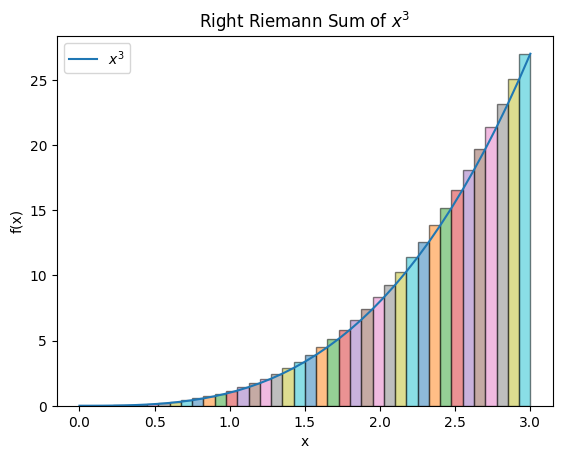

In [ ]:
# prompt: plot right had Riemann sum of x^3 between 0 and 3 in python

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**3

a = 0
b = 3
n = 40

x = np.linspace(a, b, n + 1)
y = f(x)

dx = (b - a) / n

plt.plot(x, y, label='$x^3$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Right Riemann Sum of $x^3$')

for i in range(n):
  plt.bar(x[i], y[i+1], width=dx, align='edge', edgecolor='black', alpha=0.5)


plt.legend()
plt.show()


In [ ]:
!pip install pyscf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 18.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pyscf
import scipy
#from pyscf import gto, scf, mcscf, mcpdft, lib

mol = pyscf.gto.Mole()

mol.atom = '''
  H      1.0686     -0.1411      1.0408
  C      0.5979      0.0151      0.0688
  H      1.2687      0.2002     -0.7717
  O     -0.5960     -0.0151     -0.0686
'''

mol.spin=0
mol.charge=0
mol.basis='sto-3g'
mol.build()

def get_hcore(mol):
    '''
    args:
        mol: Mole object
    returns:
        hcoreL t+v
    '''
    t = mol.intor_symmetric('int1e_kin')
    v = mol.intor_symmetric('int1e_nuc')
    hcore = t+v
    return hcore

def get_eri(mol):
    '''
    args:
        mol: Mole object
    returns:
        electron repulsion integrals
    '''
    eri = mol.intor('int2e')
    return eri

def get_veff(mol,dm):
    eri = get_eri(mol)
    J = np.einsum('pqrs, qp->rs', eri, dm)
    K = np.einsum('pqrs, rq->ps', eri, dm)
    return J - 0.5*K

def construct_fock(mol,dm):
    '''
    args:
        mol: Mole object
        dm: density matrix
    returns:
        fock: Fock matrix
    '''
    hcore = get_hcore(mol)
    veff = get_veff(mol,dm)
    fock = hcore + veff
    return fock

nbasis = mol.nao
h1 = np.zeros([nbasis, nbasis])

def construct_dm(mol, mo_coeff):
    '''
    args:
        mol: Mole object
        mo_coeff = molecular orbital coefficients
    returns:
        dm: density matrix
    '''
    nocc = (mol.nelectron//2)
    dm = 2. * np.dot(mo_coeff[:, :nocc], mo_coeff[:, :nocc].T)
    return dm

mo_coeff = np.zeros_like(h1)
dm = construct_dm(mol, mo_coeff)

def get_energy(mol, dm):
    h1 = get_hcore(mol)
    veff = get_veff(mol, dm)
    energy = np.einsum('pq, qp->', h1, dm) \
            + 0.5 * np.einsum('pq,qp->', veff, dm)\
            + mol.energy_nuc()
    return energy

def generalized_eigval(fock, s):
    mo_energy, mo_coeff = scipy.linalg.eigh(fock, s)
    return mo_energy, mo_coeff

def scf_procedure(mol, ethresh=1e-7, dmthresh=1e-7, maxiter=100):
# obtain overlap matrix
    s = mol.intor_symmetric('int1e_ovlp')

# initial guess
    mo_coeff = np.zeros_like(s)
    dm = construct_dm(mol, mo_coeff)

# start SCF Procedure
    converge = False
    energy = 0
    for i in range(maxiter):
        fock = construct_fock(mol,dm)
        mo_energy, mo_coeff = generalized_eigval(fock, s)
        new_dm = construct_dm(mol, mo_coeff)
        new_energy = get_energy(mol, new_dm)
        print('Iteration: ', i, 'energy: ' , new_energy)
        if np.abs(energy - new_energy) < ethresh and np.linalg.norm(new_dm - dm) < dmthresh:
            converge = True
            print("SCF has converged :^) ")
            break

        dm = new_dm
        energy = new_energy
    if not converge:
        print("SCF has not converged, womp womp ")
    return energy, mo_coeff

if __name__ == '__main__':

    energy = scf_procedure(mol)[0]
    print('printing energy here:', energy)



Iteration:  0 energy:  -107.10676547060143
Iteration:  1 energy:  -103.27925466934781
Iteration:  2 energy:  -110.5280705058154
Iteration:  3 energy:  -110.71358404278007
Iteration:  4 energy:  -111.81369621287732
Iteration:  5 energy:  -112.05955897386238
Iteration:  6 energy:  -112.25151285999269
Iteration:  7 energy:  -112.31418356359828
Iteration:  8 energy:  -112.34031252787528
Iteration:  9 energy:  -112.34890987398805
Iteration:  10 energy:  -112.3519686857187
Iteration:  11 energy:  -112.35298565845207
Iteration:  12 energy:  -112.35333396841895
Iteration:  13 energy:  -112.3534507908839
Iteration:  14 energy:  -112.35349039433743
Iteration:  15 energy:  -112.35350372917844
Iteration:  16 energy:  -112.3535082358847
Iteration:  17 energy:  -112.35350975557714
Iteration:  18 energy:  -112.35351026868759
Iteration:  19 energy:  -112.35351044180652
Iteration:  20 energy:  -112.35351050024158
Iteration:  21 energy:  -112.35351051996136
Iteration:  22 energy:  -112.35351052661716
It

In [ ]:
#!/usr/bin/env python

'''
Initialize a molecular system.

There are many methods to define/initialize a molecule.  This example presents
three methods to create/initialize the molecular object.  Mole object is a
Python object.  You can initialize the Mole object using any methods supported
by Python.

See also

pyscf/examples/pbc/06-load_mol_from_chkfile.py  to initialize mol from chkfile

pyscf/examples/pbc/00-input_cell.py  for initialization of crystal

'''

from pyscf import gto

#
# First method is to assign the geometry, basis etc. to Mole object, then
# call build() function to initialize the molecule
#
mol = gto.Mole()
mol.atom = '''O 0 0 0; H  0 1 0; H 0 0 1'''
mol.basis = 'sto-3g'
mol.build()

#
# Shortcuts for initialization.
#
# Use the keyword arguments of mol.build() to initialize a molecule
#
mol = gto.Mole()
mol.build(
    atom = '''O 0 0 0; H  0 1 0; H 0 0 1''',
    basis = 'sto-3g',
)

#
# Use shortcut function gto.M or pyscf.M to initialize a molecule
#
mol = gto.M(
    atom = '''O 0 0 0; H  0 1 0; H 0 0 1''',
    basis = 'sto-3g',
)

import pyscf
mol = pyscf.M(
    atom = '''O 0 0 0; H  0 1 0; H 0 0 1''',
    basis = 'sto-3g',
)



#
# Other parameters
# ================
#

mol.charge = 0
mol.spin = 0 # 2j == nelec_alpha - nelec_beta
mol.symmetry = 1  # Allow the program to apply point group symmetry if possible
# .unit can be 'bohr', 'ang' to indicate the coordinates unit of the input mol.atom
# If a number is assigned to unit, this number will be used as the length of
# 1 Bohr (in Angstrom).  Eg you can double the bond length of a system by
# setting mol.unit = 0.529*.5.
mol.unit = 'Ang'    # (New in version 1.1)

# Output
# ------
# To write output on disk, assign a filename to Mole.output
mol.output = 'path/to/my_out.txt'
# if Mole.output is not given, the default output would be stdout

# Print level
# -----------
# Mole.verbose is used to control print level.  The print level can be 0 (quite,
# no output) to 9 (very noise).  The default level is 1, which only outputs the
# error message, it works almost the same as level 0.  Level 4 (info), or 5 (debug)
# are recommended value if some calculation detials are needed.
mol.verbose = 4
# level 4 hides some details such as CPU timings, the orbital energies during
# the SCF iterations.

# max memory to use
# -----------------
mol.max_memory = 1000 # in MB
# or use evnrionment  PYSCF_MAX_MEMORY  to control the memory usage
# (New in PySCF-1.3) eg
#    export PYSCF_MAX_MEMORY=10000 # 10 GB
#    python 00-input_mole.py

# Whether to use Cartesian GTOs (New since version 1.5)
# -----------------------------------------------------
# default: False
mol.cart = True